In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'data_description.txt', 'train.csv']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

# Data exploration

In [3]:
train.shape

(1460, 81)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [8]:
print('train: ' + str(train.shape))
print('test: ' + str(test.shape))

train: (1460, 80)
test: (1459, 79)


In [9]:
initial_train = train.copy()

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)

train = data[:ntrain]
test = data[ntrain:]

print('train: ' + str(train.shape))
print('test: ' + str(test.shape))
print('data: ' + str(data.shape))

train: (1460, 79)
test: (1459, 79)
data: (2919, 79)


# Missing values

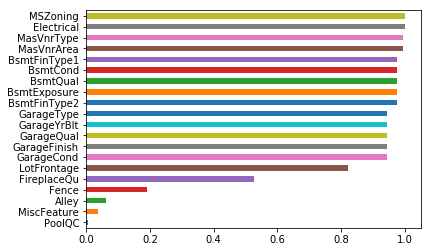

In [10]:
data_missing_percent = pd.Series(index=train.columns)

for column_name in train:
    data_missing_percent[column_name] = train[column_name].count()/train.shape[0]
    
data_missing_percent_sorted = data_missing_percent.sort_values()[:20]
data_missing_percent_sorted.plot.barh()
#sns.barplot(x=data_missing_percent_sorted, y=data_missing_percent_sorted.index)

In [11]:
missing_count = data.isnull().sum().sort_values(ascending=False)
missing_percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([missing_count, missing_percent], axis=1, keys=['Count', 'Percent'])
missing_df = missing_df[missing_df.Count > 0]
missing_df

,Count,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageCond,159,0.054471


Author of the dataset has very interesting sense of humor. He marked absence of smth in some columns as NA which in ML means that values wasn't recorded. 

* LotFrontage: Linear feet of street connected to property. I can't imagine that this would be 0 (as this would be a property without access), so either impute mean, or maybe see if there's a correlation with LotArea (like square root?).

* Alley: Type of alley access to property -> Many missing values, I would presume that these properties just don't have an alley access.

* MasVnrType/MasVnrArea -> both have 8 values missing, I presume they are the same ones. Either set as "None"/0 or use most frequent value/median.

* Bsmt... Variables: A number of variables in connection with the basement. About the same number of missing values. However, there are two basement-related variables without missing values "BsmtFinSF1" and "BsmtFinSF2" - look at those and then decide what to do with the missing values.

* Electrical: Just one missing value - here just impute most frequent one.

* FireplaceQu: I assume the properties with missing values just don't have a fireplace. There's also the variable Fireplaces (without missing values) - check this and then decide.

* Garage ... Variables: 81 missing in these columns. However, there are some Garage-related variables without missing values: GarageCars, GarageArea - check these and then decide.

* PoolQC - probably no pool - but check against PoolArea (which has no missing values).

* Fence: Many missing values - probably no fence, just impute 'None'

* MiscFeature: Assuming none - probably no special features, just impute 'None'

## LotFrontage/LotArea
A number of values are missing and one possibility would be to just impute the mean. However, there should actually be a correlation with LotArea, which has no missing values.

In [12]:
# check correlation with LotArea
data['LotFrontage'].corr(data['LotArea'])

0.48989557038716647

Ok, that's not great. I we assume that most lots are rectangular, using the square root might be an improvement.

In [13]:
data['SqrtLotArea']=np.sqrt(data['LotArea'])
data['LotFrontage'].corr(data['SqrtLotArea'])

0.6476580398617827

improvement - and good enough for now

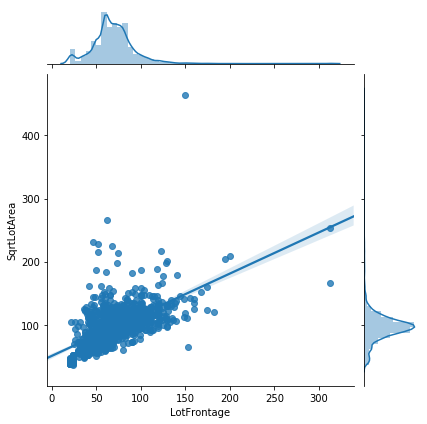

In [14]:
# Add regression and kernel density fits:
sns.jointplot(x='LotFrontage',y='SqrtLotArea',data=data,kind='reg')

In [15]:
missing_loc = data['LotFrontage'].isnull()
data.LotFrontage[missing_loc] = data.SqrtLotArea[missing_loc]

In [16]:
del(data['SqrtLotArea'])

## Alley
Empty fields here mean no alley access

In [17]:
data['Alley'].fillna("None", inplace=True)

## MasVnr
**MasVnrType** and **MasVnrArea** both have 8 missing values.

In [18]:
masvnr_cols = ['MasVnrType','MasVnrArea'] 
data[masvnr_cols][data['MasVnrType'].isnull()==True]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
1691,NaN,NaN
1706,NaN,NaN


So, the missing values for the "MasVnr..."  variables are in the same rows.

In [19]:
data['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

Since "None" is the most frequent value, I will impute "None" for the Type, and 0.0 for the area.

In [20]:
for col in masvnr_cols:
    if data[col].dtype==np.object:
        data[col].fillna("None", inplace=True)
    elif data[col].dtype == 'int64':
        data[col].fillna(0, inplace=True)
    elif data[col].dtype == 'float64':
        data[col].fillna(0.0, inplace=True)

## Basement

In [21]:
basement_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                 'BsmtFinSF1','BsmtFinSF2', 'BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtUnfSF']
data[basement_cols][data['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtHalfBath,BsmtFullBath,TotalBsmtSF,BsmtUnfSF
17,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
182,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
259,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
342,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
362,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
371,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


So in the cases where the categorical variables are NaN, the numerical ones are 0. Which means there's no basement, so the categorical ones should also be set to "None".

In [22]:
for col in basement_cols:
    if data[col].dtype==np.object:
        data[col].fillna("None", inplace=True)
    elif data[col].dtype == 'int64':
        data[col].fillna(0, inplace=True)
    elif data[col].dtype == 'float64':
        data[col].fillna(0.0, inplace=True)

In [23]:
data[basement_cols].isnull().any()

BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinType2    False
BsmtFinSF1      False
BsmtFinSF2      False
BsmtHalfBath    False
BsmtFullBath    False
TotalBsmtSF     False
BsmtUnfSF       False
dtype: bool

In [24]:
data['BsmtFinSF1'].dtype

dtype('float64')

## Electrical

In [25]:
data['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

Impute most frequent value

In [26]:
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

## Fireplace

In [27]:
data['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [28]:
data[['Fireplaces','FireplaceQu']][data['FireplaceQu'].isnull()==True].describe()

,Fireplaces
count,1420.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [29]:
data['FireplaceQu'].fillna('None', inplace=True)

In [30]:
pd.crosstab(data.Fireplaces, data.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,None,Po,TA
Fireplaces,,,,,,
0,0,0,0,1420,0,0
1,37,63,627,0,46,495
2,5,10,112,0,0,92
3,1,1,5,0,0,4
4,0,0,0,0,0,1


## Garages

In [31]:
garage_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
data[garage_cols].isnull().any()

GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageCars      True
GarageArea      True
GarageQual      True
GarageCond      True
dtype: bool

In [32]:
data[garage_cols][data['GarageType'].isnull()==True].describe()

,GarageYrBlt,GarageCars,GarageArea
count,0.0,157.0,157.0
mean,NaN,0.0,0.0
std,NaN,0.0,0.0
min,NaN,0.0,0.0
25%,NaN,0.0,0.0
50%,NaN,0.0,0.0
75%,NaN,0.0,0.0
max,NaN,0.0,0.0


In [33]:
for col in garage_cols:
    if data[col].dtype==np.object:
        data[col].fillna("None", inplace=True)
    elif data[col].dtype == 'int64':
        data[col].fillna(0, inplace=True)
    elif data[col].dtype == 'float64':
        data[col].fillna(0.0, inplace=True)

## Pool

In [34]:
train[['PoolArea', 'PoolQC']][train['PoolQC'].isnull()==True].describe()

,PoolArea
count,1453.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [35]:
data['PoolQC'].fillna("None", inplace=True)

## Fence

In [36]:
data['Fence'].fillna("None", inplace=True)

## MiscFeature

In [37]:
data['MiscFeature'].fillna("None", inplace=True)

## MSZoning 
(The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [38]:
data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [39]:
data['MSZoning'].fillna(data['MSZoning'].mode()[0], inplace=True)

## Utilities 
For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [40]:
del(data['Utilities'])

## Functional 
data description says NA means typical

In [41]:
data["Functional"].fillna("Typ", inplace=True)

## KitchenQual
Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [42]:
data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [43]:
data['KitchenQual'].fillna(data['KitchenQual'].mode()[0], inplace=True)

## Exterior1st and Exterior2nd
Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [44]:
data['Exterior1st'].fillna(data['Exterior1st'].mode()[0], inplace=True)
data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0], inplace=True)

 ## SaleType
 Fill in again with most frequent which is "WD"

In [45]:
data['SaleType'].fillna(data['SaleType'].mode()[0], inplace=True)

## MSSubClass 
Na most likely means No building class. We can replace missing values with None

In [46]:
data['MSSubClass'].fillna("None", inplace=True)

## Are we done?

In [47]:
data.isnull().any().any()

False

Yes, all missing values are gone!

# Outlier Removal

In [48]:
train_in_data = pd.concat((pd.Series(y_train), data[['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'LotFrontage']][:ntrain]), axis=1).reset_index(drop=True)
train_in_data.rename(index=str, columns={0: "SalePrice"}, inplace=True)

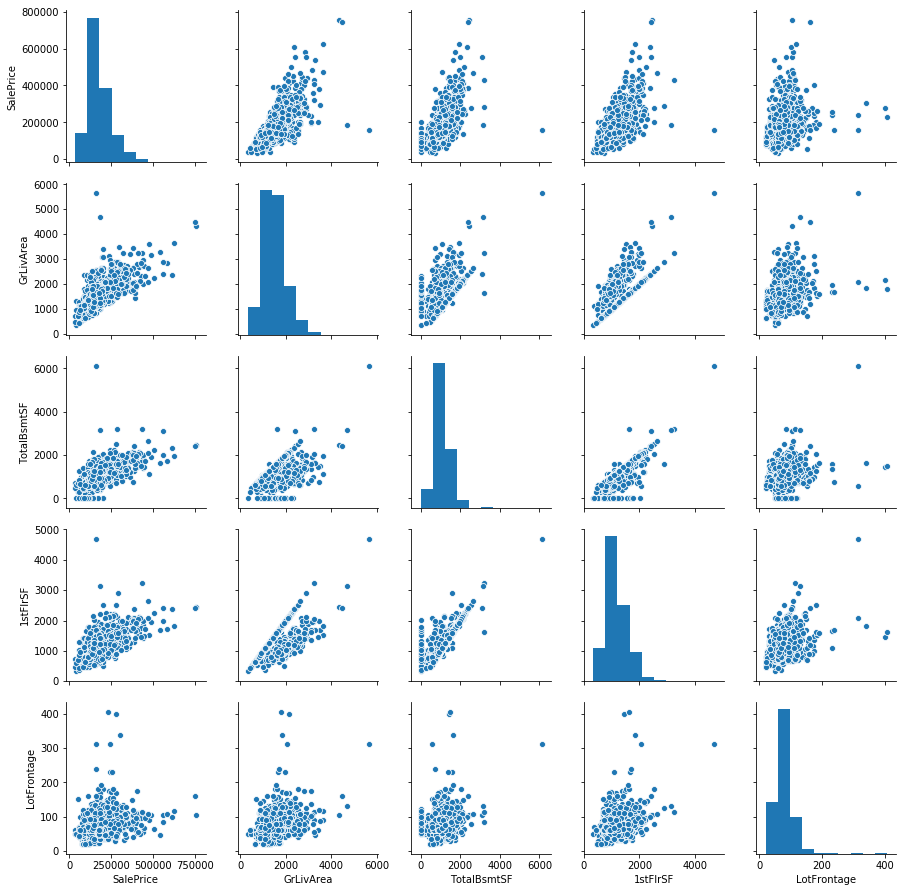

In [49]:
sns.pairplot(train_in_data)

In [50]:
# GrLivArea
train_in_data[(train_in_data['GrLivArea']>4000) & (train_in_data['SalePrice'] < 200000)].index.tolist()

['523', '1298']

In [51]:
# TotalBsmtSF
train_in_data[(train_in_data['TotalBsmtSF'] > 4000) & (train_in_data['SalePrice'] < 200000)].index.tolist()

['1298']

In [52]:
# LotFrontage
train_in_data[(train_in_data['LotFrontage'] > 250) & (train_in_data['SalePrice'] < 300000)].index.tolist()

['249', '335', '934', '1298']

In [53]:
train_in_data[(train_in_data['TotalBsmtSF'] > 4000) & (train_in_data['SalePrice'] < 200000)].index.tolist()

['1298']

In [54]:
# we'll remove [1298]
#data = data.drop([1298])

# Feature Engineering

In [55]:
# Group variable according to its datatype
train.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'EnclosedPorch',
        'Fireplaces', 'FullBath', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
        'LotArea', 'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold',
        'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
        'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'],
       dtype='object'),
 dtype('float64'): Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
        'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea',
        'TotalBsmtSF'],
       dtype='object'),
 dtype('O'): Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
        'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
        'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
        'GarageFinish', 'GarageQual',

Out of all the above integer type variables, it can be easily seen that all the year related variables, OverallCond, and MSSubClass variable is actually should be categorical in nature but are in Numeric form. This could highly influence our model as computer language or even ML Models can only understand numbers than categories. In this case, let's say for example the year 2000 will be given less importance than year 2018 as we know numerically 2018 is greater than 2000. Inorder to avoid such bias, it should be converted to categorical.

In [56]:
'''
#MSSubClass=The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
train['YearBuilt'] = train['YearBuilt'].astype(str)
train['YearRemodAdd'] = train["YearRemodAdd"].astype(str)
'''

'\n#MSSubClass=The building class\ntrain[\'MSSubClass\'] = train[\'MSSubClass\'].apply(str)\n\n#Changing OverallCond into a categorical variable\ntrain[\'OverallCond\'] = train[\'OverallCond\'].astype(str)\n\n\n#Year and month sold are transformed into categorical features.\ntrain[\'YrSold\'] = train[\'YrSold\'].astype(str)\ntrain[\'MoSold\'] = train[\'MoSold\'].astype(str)\ntrain[\'YearBuilt\'] = train[\'YearBuilt\'].astype(str)\ntrain[\'YearRemodAdd\'] = train["YearRemodAdd"].astype(str)\n'

Practically, **the larger the area, the more the price of the property is**. As in our data, Garage and Area related variables have significant relationship with SalePrice Target Variable. I came to know that it would be good to make a feature engineering on that attribute

In [57]:
# Adding a new total feature 
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
#data = data.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'])

# Data transformation. Skewness

In [58]:
from scipy.stats import skew, norm
from scipy import stats


 mu = 180921.20 and sigma = 79415.29



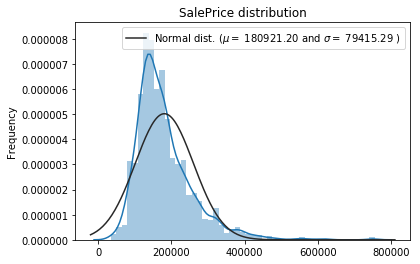

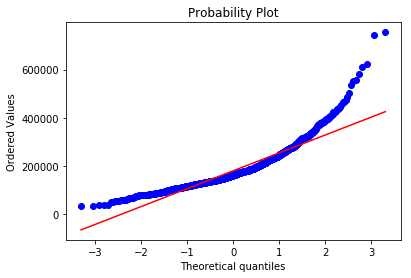

In [59]:
def plot_price_distribution():
    sns.distplot(y_train , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(y_train)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(y_train, plot=plt)
    plt.show()

plot_price_distribution()

In [60]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
y_train = np.log1p(y_train)


 mu = 12.02 and sigma = 0.40



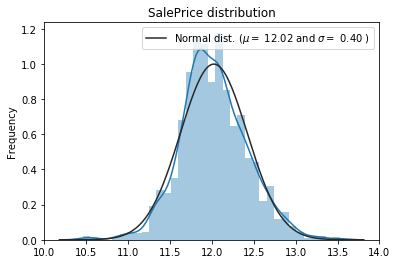

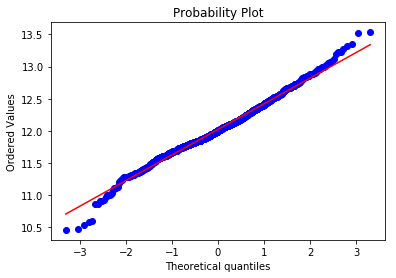

In [61]:
plot_price_distribution()

In [62]:
numeric_features = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_features = data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(20)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


In [63]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feature in skewed_features:
    data[feature] = boxcox1p(data[feature], lam)

There are 37 skewed numerical features to Box Cox transform


## Categorical to Dummy Variables 

In [64]:
data = pd.get_dummies(data)

In [65]:
# Getting the new train and test sets.
train = data[:ntrain]
test = data[ntrain:]

# Modeling

Import librairies

In [66]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import KFold, cross_val_score, train_test_split

# algorithms to train a model
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [67]:
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(train, y_train, random_state = 0)

In [68]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Define a cross validation strategy
# We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation
n_folds = 5

# Validation function
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [69]:
lr = LinearRegression()
lr.fit(X_train_train, y_train_train)

preds_lr = lr.predict(X_train_test)
print(rmsle_cv(lr).mean())
#score_lr = cross_val_score(lr, train, y_train, cv=10).mean()
#print(score_lr)

0.14347144442370313


In [70]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=0)
xgb.fit(train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_train_test, y_train_test)], verbose=False)

preds_xgb = xgb.predict(X_train_test)
print(rmsle_cv(xgb).mean())
#score_xgb = cross_val_score(xgb, train, y_train, cv=10).mean()
#print(score_xgb)

0.12277268790979898


In [71]:
#The best so far.
#7568.540767103979
#0.9010309131170569

#0.12277268790979898

# Base models

In [72]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import xgboost as xgb
import lightgbm as lgb

### LASSO Regression :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's **Robustscaler()** method on pipeline

In [73]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

### Elastic Net Regression :
again made robust to outliers

In [74]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

### Kernel Ridge Regression :

In [75]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

### Gradient Boosting Regression :
With **huber** loss that makes it robust to outliers

In [76]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)


### XGBoost :

In [77]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

### LightGBM :

In [78]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

## Base models scores
Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

In [79]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1235 (0.0165)



In [80]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1236 (0.0165)



In [81]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1260 (0.0130)



In [82]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1228 (0.0142)



In [83]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1224 (0.0098)



In [84]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1227 (0.0097)



# Stacking models
## Simplest Stacking approach : Averaging base models
We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance — https://en.wikipedia.org/wiki/Inheritance_(object-oriented_programming))

### Averaged base models class

In [85]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

### Averaged base models score

We just average four models here **ENet, GBoost, KRR and lasso**. Of course we could easily add more models in the mix.

In [86]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1192 (0.0147)



Wow ! It seems even the simplest stacking approach really improve the score . This encourages us to go further and explore a less simple stacking approch.

## Less simple Stacking : Adding a Meta-model

In [87]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

### Stacking Averaged models Score
To make the two approaches comparable (by using the same number of models) , we just average **Enet KRR and Gboost**, then we add **lasso as meta-model**.

In [88]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

KeyError: '[   0    1    2    3    4    5    6    7    9   10   11   13   14   15\n   16   18   19   21   22   23   24   25   26   27   28   29   30   32\n   33   34   36   37   39   40   41   42   43   45   46   48   49   50\n   51   54   55   58   59   60   61   63   64   65   66   67   68   69\n   70   72   73   74   75   76   77   78   80   81   82   83   84   85\n   86   87   90   91   92   93   94   95   97   98   99  100  101  103\n  104  105  106  107  111  112  113  115  116  118  119  120  122  123\n  124  126  127  128  129  130  131  133  134  135  136  137  138  139\n  141  142  143  144  145  147  148  150  151  152  153  154  155  156\n  157  158  159  160  161  162  163  164  165  166  168  169  170  172\n  173  174  175  177  178  179  180  181  182  183  184  185  186  187\n  188  189  190  191  192  193  195  197  198  199  201  202  203  204\n  205  206  207  209  210  211  214  216  217  219  220  222  223  224\n  225  230  231  232  234  235  236  237  238  240  241  243  244  245\n  246  247  248  249  250  251  252  253  254  255  256  257  259  261\n  262  263  264  265  267  268  270  271  272  274  275  276  277  278\n  279  280  281  283  284  285  287  288  289  292  294  295  296  297\n  298  299  300  301  302  303  304  307  308  310  313  314  315  316\n  317  320  322  323  324  325  326  327  329  330  331  332  333  334\n  335  338  339  340  341  342  343  344  345  346  348  351  352  353\n  354  355  358  359  360  361  362  363  364  365  366  368  369  370\n  372  373  374  376  377  378  381  382  383  384  385  387  388  389\n  390  392  393  394  395  396  397  398  399  400  401  403  404  405\n  406  409  411  412  413  415  416  417  418  419  420  421  423  424\n  425  427  428  429  430  431  432  434  436  437  438  439  440  441\n  444  445  446  447  449  450  451  452  453  455  456  458  459  460\n  461  462  464  466  467  468  469  470  471  472  473  475  476  477\n  478  479  480  481  482  483  484  485  486  487  488  489  491  492\n  493  494  495  496  497  498  499  500  501  502  503  504  505  510\n  511  512  513  514  515  516  517  518  519  520  521  523  524  525\n  526  528  529  530  532  533  534  536  538  539  542  543  545  546\n  547  549  550  551  552  553  554  555  556  557  558  559  560  561\n  563  564  565  566  567  568  569  570  571  573  574  577  578  579\n  580  581  582  584  585  587  589  590  592  593  596  597  598  600\n  601  602  603  605  607  608  610  611  612  613  614  615  616  617\n  619  620  621  623  624  625  626  627  628  629  630  631  632  633\n  637  639  641  642  643  644  645  646  647  648  649  650  651  652\n  653  654  655  656  657  658  659  661  662  663  665  666  667  668\n  669  670  671  673  674  675  676  677  679  681  683  684  685  686\n  687  688  689  691  692  693  694  695  696  697  698  699  701  702\n  703  706  707  709  711  712  713  714  715  716  718  719  720  721\n  722  723  724  725  726  727  728  729  730  731  732  733  734  735\n  737  738  739  740  741  742  743  744  746  747  749  750  751  752\n  753  754  755  756  758  760  762  763  764  765  766  767  768  769\n  770  771  772  773  774  776  777  778  779  780  781  783  784  785\n  786  787  788  789  790  791  792  793  794  795  798  799  801  802\n  803  804  805  806  807  808  809  811  812  815  816  817  818  820\n  821  822  823  824  825  827  829  830  831  832  834  836  837  839\n  840  841  844  845  847  848  849  850  851  852  853  854  855  856\n  857  858  859  860  861  862  863  864  865  867  869  870  871  872\n  873  874  875  876  877  878  879  880  881  882  883  886  887  888\n  889  890  892  893  894  896  897  898  899  900  901  904  906  908\n  909  910  911  912  913  914  915  916  917  918  919  921  922  923\n  925  926  928  929  934  935  936  937  938  939  940  941  942  945\n  946  947  948  949  951  952  954  955  956  957  958  960  961  962\n  963  964  965  966  967  968  969  970  971  972  973  974  976  979\n  980  981  982  983  984  985  987  988  990  991  992  993  994  995\n  997  999 1000 1002 1005 1006 1007 1010 1011 1012 1013 1015 1016 1017\n 1018 1020 1021 1022 1024 1025 1027 1028 1029 1030 1032 1033 1034 1035\n 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1049 1050\n 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1066\n 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080\n 1081 1083 1084 1085 1087 1088 1090 1091 1092 1093 1094 1095 1096 1097\n 1098 1099 1100 1101 1102 1103 1104 1106 1109 1110 1111 1112 1113 1114\n 1115 1116 1118 1119 1120 1121 1123 1124 1125 1128 1129 1130 1131 1133\n 1134 1135 1136 1137 1139 1140 1141 1144 1145 1146 1148 1149 1150 1151\n 1154 1155 1156 1159 1161 1162 1164 1165 1166 1167] not in index'

# Final Training and Prediction

**StackedRegressor:**

In [89]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.0802880139440153


**XGBoost:**

In [90]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07925422323631227


**LightGBM:**

In [91]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07465118389508953


In [92]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07691637068408153


**Ensemble prediction:**

In [93]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

**Submission**

In [94]:
#preds_xgb = xgb.predict(test)

output = pd.DataFrame({'Id': test_ID,
                      'SalePrice': ensemble})
output.to_csv('submission.csv', index=False)

# References
* https://www.kaggle.com/meikegw/filling-up-missing-values
* https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard